# DECISON_TREE_REGRESSOR

In [13]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , StandardScaler , RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression

In [14]:
df = pd.read_csv('Student_Performance (1).csv')

In [15]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [16]:
X = df.drop('Performance Index', axis=1)  # dropping dependent value
y = df['Performance Index']

In [17]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y,train_size=0.8,random_state=42)

In [18]:
num_cols=xtrain.select_dtypes(include='number').columns
cat_cols = xtrain.select_dtypes(exclude='number').columns

<Axes: >

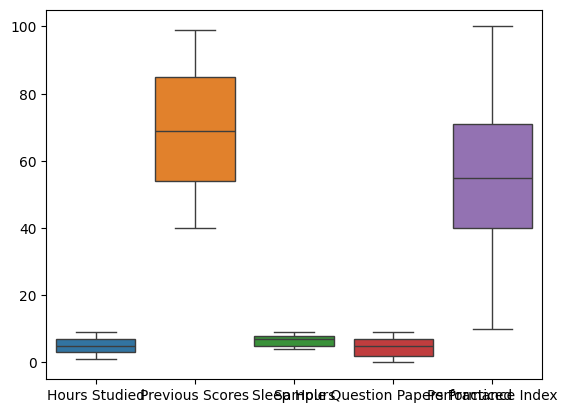

In [19]:
sns.boxplot(df)

In [20]:
preprocessing = ColumnTransformer(
    transformers=[
        ('encoder',OneHotEncoder(handle_unknown='ignore',sparse_output=False),["Extracurricular Activities"])
    ],remainder='passthrough'
)

In [21]:
pipeline = Pipeline (
    steps = [
        ('preprocessing',preprocessing),
        ('model',DecisionTreeRegressor(criterion="absolute_error"))
        # ('model',DecisionTreeRegressor(criterion='squared_error'))

    ]
)

In [22]:
pipeline.fit(xtrain,ytrain)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [23]:
# IF criterianScore is squared_error
#squared_error
'''

'''
# IF criterianScore is absolute_error
#absolute_error 
'''
Train score : 0.9993046004930477
Test score : 0.9763628676213633
'''

'\nTrain score : 0.9993046004930477\nTest score : 0.9763628676213633\n'

In [24]:
print(f"Train score : {pipeline.score(xtrain,ytrain)}")
print(f"Test score : {pipeline.score(xtest,ytest)}")

Train score : 0.9992917164456249
Test score : 0.9752830062392468
